# Monthly Rainfall Dataset - CHIRPS 

* **Products used:** 
[rainfall_chirps_monthly](https://explorer.digitalearth.africa/products/rainfall_chirps_monthly)


## Background

This notebook demonstrates how to access and use the Monthly Climate Hazards Group InfraRed Precipitation with Station data (CHIRPS) from the DE Africa Datacube. 

Estimating rainfall variations in space and time is a key aspect of drought early warning and environmental monitoring. An evolving drier-than-normal season must be placed in a historical context so that the severity of rainfall deficits can be quickly evaluated. However, estimates derived from satellite data provide areal averages that suffer from biases due to complex terrain, which often underestimate the intensity of extreme precipitation events. Conversely, precipitation grids produced from station data suffer in more rural regions where there are less rain-gauge stations. CHIRPS was created in collaboration with scientists at the USGS Earth Resources Observation and Science (EROS) Center in order to deliver complete, reliable, up-to-date data sets for a number of early warning objectives, like trend analysis and seasonal drought monitoring.

For offical information on this dataset, see [CHIRPS](https://www.chc.ucsb.edu/data/chirps).

The CHIRPS dataset in the datacube is nominally updated monthly.


**Important details:**

* Datacube product name: `rainfall_chirps_monthly`
* Measurement Type: Monthly Atmospheric precipitation
* Precipitation Units: mm
* Status: Operational
* Date-range: 1981 &ndash; Date
* Spatial resolution: 0.05 degrees approximates 5.55 KM 



## Description

In this notebook we will load CHIRPS data using `dc.load()` to return a time series of datasets.

Topics covered include:
1. Inspecting the monthly CHIRPS product and measurements available in the datacube
2. Using the native `dc.load()` function to load CHIRPS data
3. Plotting the CHIRPS datasets using `matplotlib`

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages

Import Python packages that are used for the analysis.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import datacube

### Connect to the datacube

In [2]:
dc = datacube.Datacube(app="rainfall_chirps_monthly")

## Available products and measurements

### List products

We can use datacube's `list_products` functionality to inspect the CHIRPS dataset that is available in the datacube. The table below shows the product names that we will use to load the data and a brief description of the data

In [3]:
dc.list_products().loc[dc.list_products()['name'].str.contains('chirps')]

,name,description,license,default_crs,default_resolution
name,,,,,
rainfall_chirps_monthly,rainfall_chirps_monthly,Rainfall Estimates from Rain Gauge and Satelli...,None,EPSG:4326,"(-0.05000000074505806, 0.05000000074505806)"


### List measurements

We can further inspect the data available for CHIRPS using datacube's `list_measurements` functionality. The table below lists each of the measurements available in the data.

In [16]:
measurements = dc.list_measurements()
measurements.loc["rainfall_chirps_monthly"]

,name,dtype,units,nodata,aliases,flags_definition
measurement,,,,,,
rainfall,rainfall,float32,mm,-9999.0,NaN,NaN


## Load CHIRPS data using `dc.load()`

Now that we know what products and measurements are available for the products, we can load data from the datacube using `dc.load`. 

In the first example below, we will load CHIRPS data for the Lake Turkana Wind Power Station, Kenya, for 2020. By specifying `output_crs='EPSG:6933'` and `resolution=(-5000, 5000)`, we request that datacube reproject our data to the African Albers coordinate reference system (CRS). 

> Note: For a more general discussion of how to load data using the datacube, refer to the [Introduction to loading data](../Beginners_guide/03_Loading_data.ipynb) notebook.

In [7]:
ds_rf = dc.load(product='rainfall_chirps_monthly',
                time='2020',
                y = (2.45, 2.55),
                x = (36.75, 36.85),
                resolution = (-5000, 5000),
                output_crs = 'EPSG:6933')
print(ds_rf)

<xarray.Dataset>
Dimensions:      (time: 12, x: 3, y: 4)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-16T11:59:59.500000 ... 2020-12...
  * y            (y) float64 3.275e+05 3.225e+05 3.175e+05 3.125e+05
  * x            (x) float64 3.548e+06 3.552e+06 3.558e+06
    spatial_ref  int32 6933
Data variables:
    rainfall     (time, y, x) float32 14.656683 13.438753 ... 29.71773 31.038813
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


### Plotting of CHIRPS Monthly Rainfall

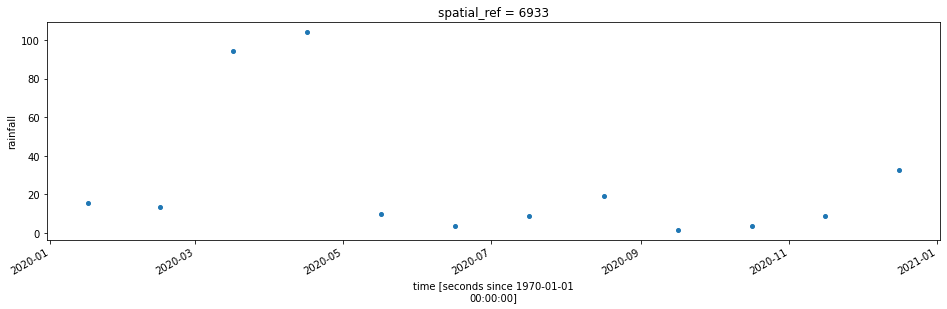

In [8]:
ds_rf['rainfall'].mean(['y','x']).plot(figsize = (16,4), marker='o', markersize=4, linewidth=0);

In the next example below, we will load CHIRPS data for the Lake Turkana Wind Power Station, Kenya, for 2000 - 2020. After loading the data we will plot the monthly rainfall data for the time period, then we will resample it to annually rainfall data

In [17]:
ds_rf_yearly = dc.load(product='rainfall_chirps_monthly',
                time= ('2000','2020'),
                y = lat,
                x = lon,
                resolution = (-5000, 5000),
                output_crs = 'EPSG:6933')

In [10]:
ds_rf_yearly

<xarray.Dataset>
Dimensions:      (time: 252, x: 3, y: 4)
Coordinates:
  * time         (time) datetime64[ns] 2000-01-16T11:59:59.500000 ... 2020-12...
  * y            (y) float64 3.275e+05 3.225e+05 3.175e+05 3.125e+05
  * x            (x) float64 3.548e+06 3.552e+06 3.558e+06
    spatial_ref  int32 6933
Data variables:
    rainfall     (time, y, x) float32 6.6814303 6.7373543 ... 29.71773 31.038813
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

### Plotting of CHIRPS Monthly Rainfall

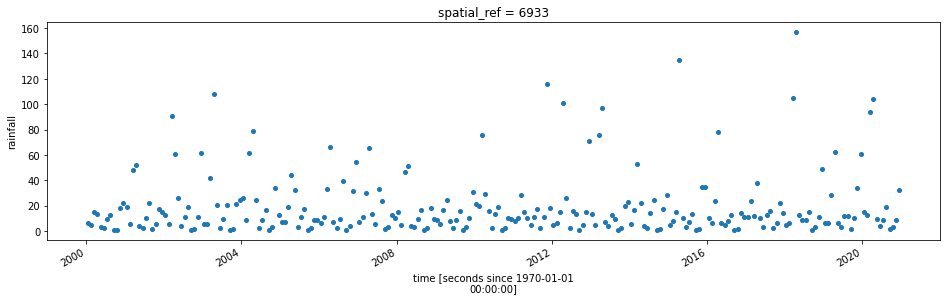

In [11]:
ds_rf_yearly['rainfall'].mean(['y','x']).plot(figsize = (16,4), marker='o', markersize=4, linewidth=0);

### Resampling of monthly to yearly rainfall

In [12]:
yearly_rf = ds_rf_yearly['rainfall'].mean(['y','x']).groupby('time.year').sum()

### Plotting of Yearly Rainfall data

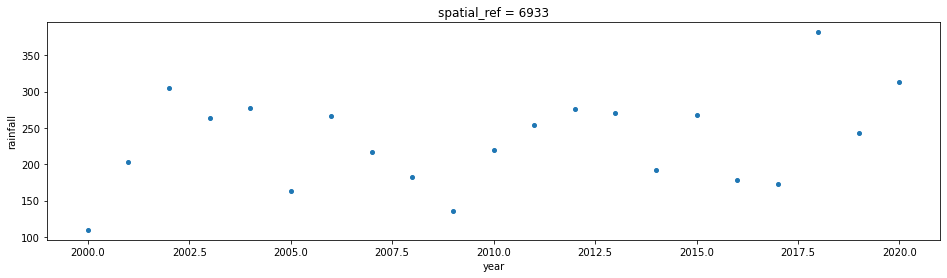

In [13]:
yearly_rf.plot(figsize = (16,4), marker='o', markersize=4, linewidth=0);

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:** 

In [14]:
print(datacube.__version__)

1.8.5


**Last Tested:**

In [15]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2021-09-27'